In [0]:
#import the libraaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#location of database
dataset = pd.read_csv('/content/gdrive/My Drive/future/natural_language_processing/Hotel_sentiments.tsv',delimiter='\t',quoting=3)

In [0]:
#cleaning the text
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
corpus = []
for i in range(0,1001):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] # removng the stop word from the database
    review = ' '.join(review) #separate by space
    corpus.append(review)
    print(corpus)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['love promis staff']
['love promis staff', 'never go']
['love promis staff', 'never go', 'back']
['love promis staff', 'never go', 'back', 'food arriv quickli']
['love promis staff', 'never go', 'back', 'food arriv quickli', 'everyth gross']
['love promis staff', 'never go', 'back', 'food arriv quickli', 'everyth gross', 'love place']
['love promis staff', 'never go', 'back', 'food arriv quickli', 'everyth gross', 'love place', 'great servic food']
['love promis staff', 'never go', 'back', 'food arriv quickli', 'everyth gross', 'love place', 'great servic food', 'friendli staff']
['love promis staff', 'never go', 'back', 'food arriv quickli', 'everyth gross', 'love place', 'great servic food', 'friendli staff', 'worth drive']
['love promis staff', 'never go', 'back', 'food arriv quickli', 'everyth gross', 'love place', 'great servic food', 'friendli staff', 'worth drive', 'he

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
#Creating bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
Y = dataset.iloc[:,1].values

In [0]:
# Splitting the dataset into the Training set and Test set
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [0]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

[0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1
 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0
 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0
 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1]


In [0]:
print(cm)

[[55 46]
 [17 83]]


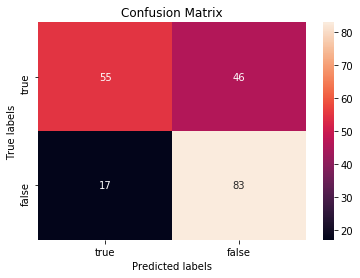

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['true', 'false']); ax.yaxis.set_ticklabels(['true', 'false']);